Bayesian A/B Testing Demo
-----

In [18]:
reset -fs

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
from scipy.special import betaln

%matplotlib inline 

# Beta distribution shape 

In [20]:
a_prior, b_prior = 1, 1 # Assume uniform prior
# a_prior, b_prior = 3, 3 # Assume non-uniform prior
rv = beta(a_prior, b_prior)
x = np.linspace(beta.ppf(0.01, a_prior, b_prior), beta.ppf(0.99, a_prior, b_prior), 100)

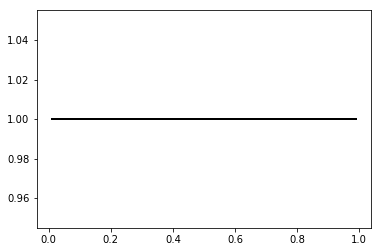

In [21]:
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='');

Let's sample from Beta distribution and generate a histogram:

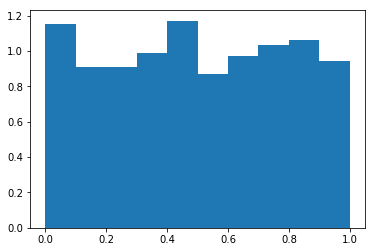

In [22]:
r = beta.rvs(a_prior, b_prior, size=1000)
plt.hist(r, normed=True);

----
Data
----

In [23]:
Aclick, Bclick = 15, 26
Anotclick, Bnotclick = 100, 110

### Evaluation using closed form solution

In [24]:
A_a = Aclick + a_prior
A_b = Anotclick + b_prior
B_a = Bclick + a_prior
B_b = Bnotclick + b_prior

prob_B_better_A = 0.0
for i in range(B_a-1):
    prob_B_better_A += np.exp(betaln(A_a+i,B_b+A_b)-np.log(B_b+i) \
                              - betaln(1+i, B_b) - betaln(A_a, A_b))
print(f"The probabilty that B is better than A: {prob_B_better_A:.3}")

The probabilty that B is better than A: 0.876


# Monte Carlo simulations

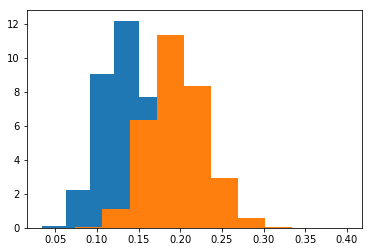

In [27]:
n_data = 100_0000
 
A_samples = beta.rvs(A_a, A_b, size=n_data)
B_samples= beta.rvs(B_a, B_b, size=n_data)

plt.hist(A_samples, normed=True);
plt.hist(B_samples, normed=True);

# probability that B > A

In [28]:
prob_B_better_A= sum(B_samples > A_samples)*1.0/n_data
print(f"The probabilty that B is better than A: {prob_B_better_A:.3}")

The probabilty that B is better than A: 0.9


## How much B is better?

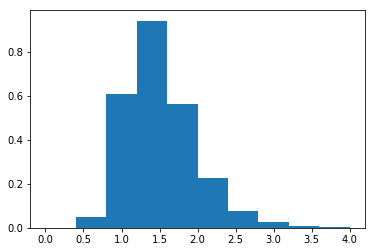

In [29]:
plt.hist(B_samples/A_samples, normed=True, range=(0,4));

A cumulative distribution function (CDF) is often a better way to find the magnitude. E.g., below plot shows there is a 20% chance that B is 80% better than A, and 50% chance that B is 40% better than A 

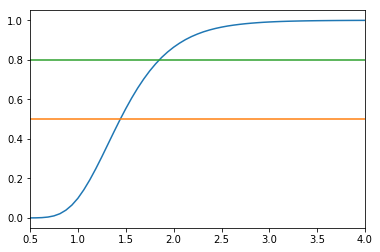

In [30]:
hist, bin_edges = np.histogram(B_samples/A_samples, bins=100,density=True)
cdf = np.cumsum(hist*np.diff(bin_edges))
plt.xlim(0.5,4)
plt.plot(bin_edges[1:],cdf)
plt.plot(bin_edges[1:],cdf**0*0.5)
plt.plot(bin_edges[1:],cdf**0*0.8);
